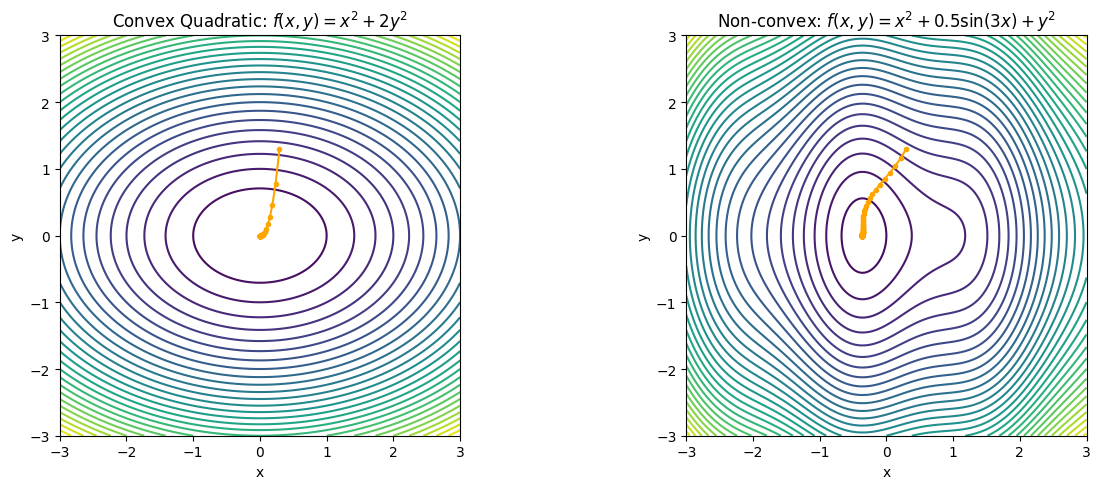

Start point: [0.29288102 1.2911362 ]
=== Convex function ===
  Last iterate: [3.89305656e-05 1.72592561e-09]   f = 1.5155889435458288e-09
=== Non‑convex function ===
  Last iterate: [-3.57818215e-01  3.42943836e-05]   f = -0.31139308645887387


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convex quadratic:  f1(x, y) = x^2 + 2 y^2
def f1(vec):
    x, y = vec
    return x**2 + 2 * y**2

def grad_f1(vec):
    x, y = vec
    return np.array([2 * x, 4 * y])

# Non‑convex:  f2(x, y) = x^2 + 0.5 sin(3x) + y^2
def f2(vec):
    x, y = vec
    return x**2 + 0.5 * np.sin(3 * x) + y**2

def grad_f2(vec):
    x, y = vec
    dfdx = 2 * x + 1.5 * np.cos(3 * x)
    dfdy = 2 * y
    return np.array([dfdx, dfdy])

def grad_descent(f_grad, start, lr=0.1, steps=60):
    path = [start.copy()]
    x = start.copy()
    for _ in range(steps):
        x -= lr * f_grad(x)
        path.append(x.copy())
    return np.array(path)

# optimisation
np.random.seed(0)
x0 = np.random.uniform(-3, 3, 2)

path1 = grad_descent(grad_f1, x0, lr=0.1, steps=40)
path2 = grad_descent(grad_f2, x0, lr=0.05, steps=100)

# Plot results
xs = np.linspace(-3, 3, 300)
ys = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(xs, ys)

def plot_path(ax, Z, path, title):
    ax.contour(X, Y, Z, levels=30, cmap='viridis')
    ax.plot(path[:, 0], path[:, 1], marker='o', markersize=3,
            linewidth=1.5, color='orange')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

Z1 = X**2 + 2 * Y**2
plot_path(ax1, Z1, path1, "Convex Quadratic: $f(x,y)=x^2+2y^2$")

Z2 = X**2 + 0.5 * np.sin(3 * X) + Y**2
plot_path(ax2, Z2, path2, "Non‑convex: $f(x,y)=x^2+0.5\\sin(3x)+y^2$")

plt.tight_layout()
plt.show()

# Print end results
print("Start point:", x0)
print("Convex function =>")
print("  Last iterate:", path1[-1], "  f =", f1(path1[-1]))
print("Non‑convex function =>")
print("  Last iterate:", path2[-1], "  f =", f2(path2[-1]))
